In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('netflix_titles_cleaned.csv')

In [3]:
df.head(4)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,no_countries,main_country
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90,Documentaries,1,United States
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",1,South Africa
2,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",1,India
3,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies",6,United States


In [60]:
topCountries

['United States', 'India', 'United Kingdom']

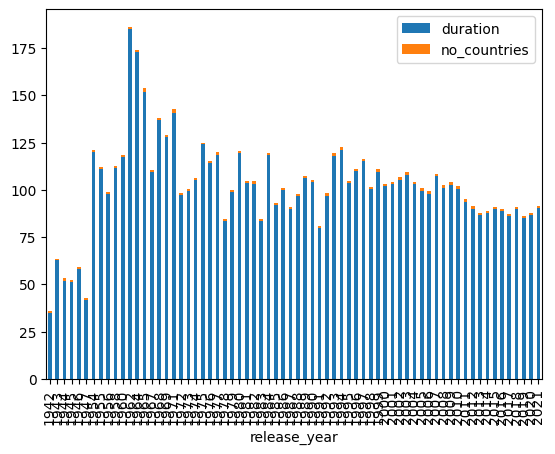

In [92]:
topCountries = list(df.groupby('main_country') \
    .size() \
    .nlargest(3).keys())

isUnitedStates = df['main_country'] == 'United States'
isIndia = df['main_country'] == 'India'

plotAxis = df[isMovie & isUnitedStates] \
    .groupby('release_year')[['duration', 'no_countries']] \
    .mean() \
    .plot.bar(stacked=True)


<AxesSubplot: xlabel='release_year'>

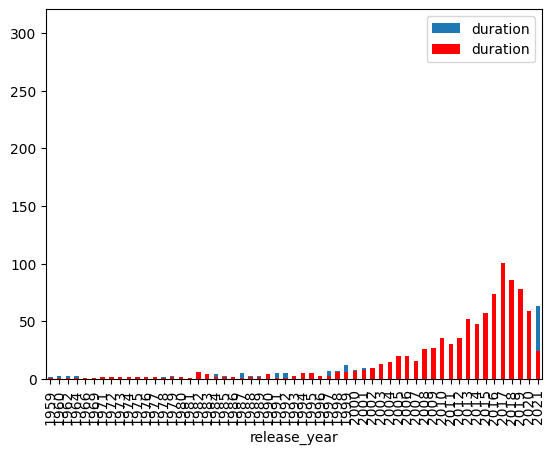

In [ ]:
topCountries = list(df.groupby('main_country') \
    .size() \
    .nlargest(3).keys())

isUnitedStates = df['main_country'] == 'United States'
isIndia = df['main_country'] == 'India'

plotAxis = df[isMovie & isUnitedStates] \
    .groupby('release_year')[['duration']] \
    .count() \
    .plot.bar(stacked=True)

df[isMovie & isIndia] \
    .groupby('release_year')[['duration']] \
    .count() \
    .plot.bar(ax=plotAxis, color='red', stacked=True)

<AxesSubplot: >

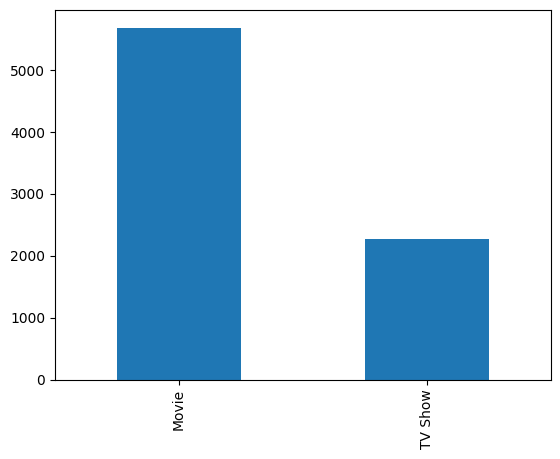

In [7]:
df['type'].value_counts().plot.bar()

<AxesSubplot: xlabel='type'>

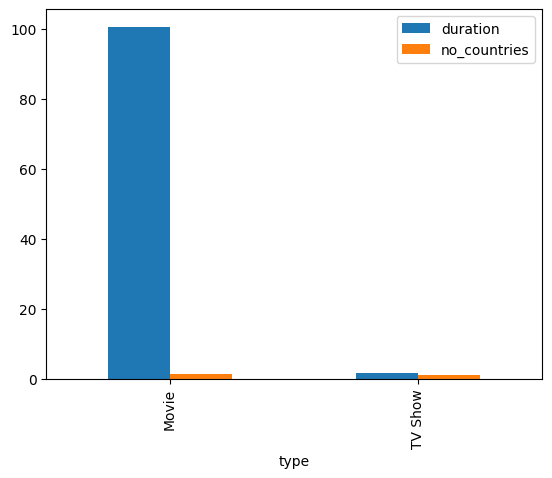

In [41]:
df.groupby('type')[['duration', 'no_countries']] \
    .mean(numeric_only=True) \
    .plot.bar()

<AxesSubplot: ylabel='main_country'>

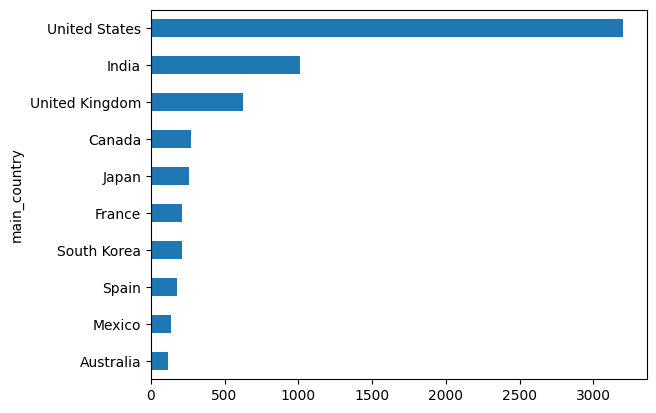

In [24]:
df.groupby('main_country') \
    .size() \
    .nlargest(10) \
    .sort_values(ascending=True) \
    .plot.barh()

<AxesSubplot: xlabel='release_year'>

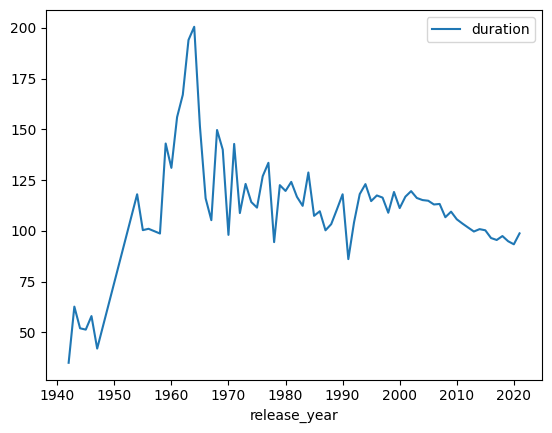

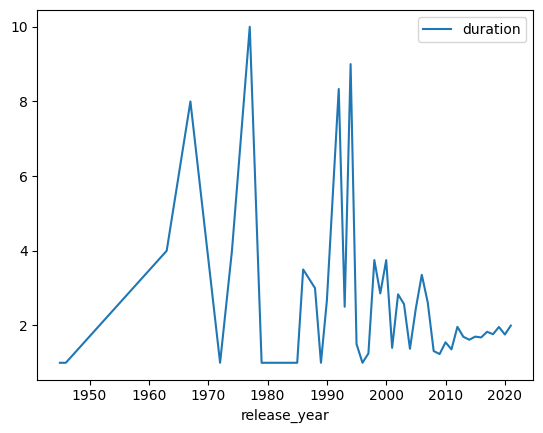

In [219]:
isMovie = df['type'] == 'Movie'
df[isMovie].groupby('release_year')['duration'].mean().reset_index().sort_values('release_year').plot(x='release_year', y='duration')
df[~isMovie].groupby('release_year')['duration'].mean().reset_index().sort_values('release_year').plot(x='release_year', y='duration')

Text(0, 0.5, 'average title length')

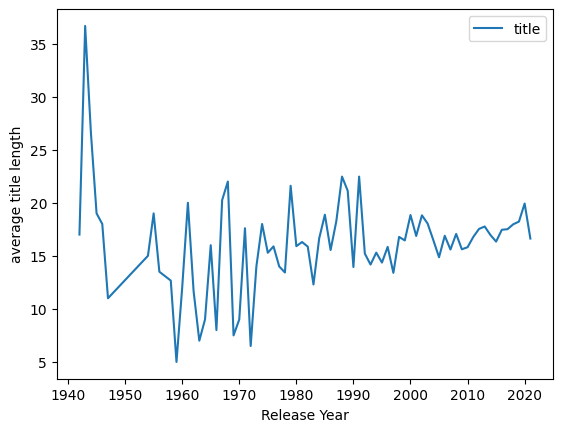

In [28]:
def meanLength(x):
    return x.str.len().mean()

ax = df[isMovie].groupby('release_year')['title'] \
    .agg(meanLength) \
    .reset_index() \
    .plot(x='release_year', y='title')

ax.set_xlabel('Release Year')
ax.set_ylabel('average title length')

In [38]:
isOld = df['release_year'] < 1948
df[isMovie & isOld].sort_values(by='release_year')

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,no_countries,main_country
6986,s7791,Movie,Prelude to War,United States,2017-03-31,1942,TV-14,52,"Classic Movies, Documentaries",1,United States
7384,s8206,Movie,The Battle of Midway,United States,2017-03-31,1942,TV-14,18,"Classic Movies, Documentaries",1,United States
7821,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,United States,2017-03-31,1943,TV-PG,61,"Classic Movies, Documentaries",1,United States
7897,s8740,Movie,Why We Fight: The Battle of Russia,United States,2017-03-31,1943,TV-PG,82,Documentaries,1,United States
7920,s8764,Movie,WWII: Report from the Aleutians,United States,2017-03-31,1943,TV-PG,45,Documentaries,1,United States
7590,s8420,Movie,The Memphis Belle: A Story of a\nFlying Fortress,United States,2017-03-31,1944,TV-PG,40,"Classic Movies, Documentaries",1,United States
7606,s8437,Movie,The Negro Soldier,United States,2017-03-31,1944,TV-14,40,"Classic Movies, Documentaries",1,United States
7801,s8641,Movie,Tunisian Victory,"United States, United Kingdom",2017-03-31,1944,TV-14,76,"Classic Movies, Documentaries",2,United States
6462,s7220,Movie,Know Your Enemy - Japan,United States,2017-03-31,1945,TV-14,63,"Classic Movies, Documentaries",1,United States
6781,s7576,Movie,Nazi Concentration Camps,United States,2017-03-31,1945,TV-MA,59,"Classic Movies, Documentaries",1,United States
